In [20]:
# imports
import pandas as pd
import config
import config_func
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# acess image data
PROJECT_DIR = os.getcwd()
INPUT_DIR = os.path.join(PROJECT_DIR, config.INPUT_DIR) # path of input directory
IMAGE_REGEX = os.path.join(INPUT_DIR, config.IMAGES_ACESS) # regex path for all images on images directory


In [3]:
# get csv data file with train labels, and convert it to DataFrame object
CSV_FILE_PATH = os.path.join(INPUT_DIR, config.TRAIN_LABELS_CSV)
data = pd.read_csv(CSV_FILE_PATH)
print(data.head(5))


      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


In [4]:
# get all images paths in coherent order with DataFrame
images_files = config_func.getImages(IMAGE_REGEX) # glob retrieves data in this directory
print(images_files[:5])


['C:\\Users\\gusta\\Desktop\\Projetos_Python\\Diabetic_Retinopathy\\input\\images\\10_left.jpeg', 'C:\\Users\\gusta\\Desktop\\Projetos_Python\\Diabetic_Retinopathy\\input\\images\\10_right.jpeg', 'C:\\Users\\gusta\\Desktop\\Projetos_Python\\Diabetic_Retinopathy\\input\\images\\13_left.jpeg', 'C:\\Users\\gusta\\Desktop\\Projetos_Python\\Diabetic_Retinopathy\\input\\images\\13_right.jpeg', 'C:\\Users\\gusta\\Desktop\\Projetos_Python\\Diabetic_Retinopathy\\input\\images\\15_left.jpeg']


In [6]:
# add image path column to DataFrame, associated with it's respective column
data = config_func.addNewColumn_Populate_DataFrame(data,config.IMAGE_PATH, images_files)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
print(data.head(5).append(data.tail(5)))


             image  level                                                                                 image_path
0      10_left      0      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\10_left.jpeg    
1      10_right     0      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\10_right.jpeg   
2      13_left      0      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\13_left.jpeg    
3      13_right     0      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\13_right.jpeg   
4      15_left      1      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\15_left.jpeg    
35121  44347_right  0      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\44347_right.jpeg
35122  44348_left   0      C:\Users\gusta\Desktop\Projetos_Python\Diabetic_Retinopathy\input\images\44348_left.jpeg 
35123  44348_right  0      C:\Users\gusta\Desktop\Projetos_Pytho

c:\users\gusta\desktop\projetos_python\diabetic_retinopathy\venv\test\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [7]:
# data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       35126 non-null  object
 1   level       35126 non-null  int64 
 2   image_path  35126 non-null  object
dtypes: int64(1), object(2)
memory usage: 823.4+ KB


In [8]:
# shape of data --> number of images
data.shape


(35126, 3)

In [13]:
# check columns of DataFrame
data.columns


Index(['image', 'level', 'image_path'], dtype='object')

In [11]:
# check null values
data.isnull().sum()


image         0
level         0
image_path    0
dtype: int64

In [14]:
# check for duplicated values
exist_duplicated = data.duplicated().any()
exist_duplicated


False

In [17]:
# how many classes exist
number_classes = data[config.TARGET].unique()
sorted(number_classes)


[0, 1, 2, 3, 4]

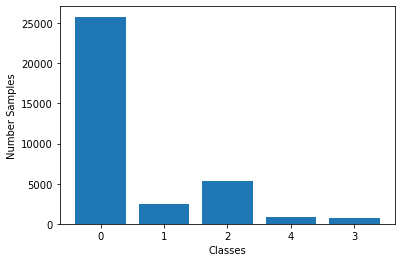

In [21]:
# plot samples per class
x_pos = np.arange(len(number_classes))
samples_per_class = [
    data.loc[data.level == 0, 'level'].count(),
    data.loc[data.level == 1, 'level'].count(),
    data.loc[data.level == 2, 'level'].count(),
    data.loc[data.level == 3, 'level'].count(),
    data.loc[data.level == 4, 'level'].count()
]
plt.bar(x_pos, samples_per_class, align='center')
plt.xticks(x_pos, number_classes)
plt.xlabel('Classes')
plt.ylabel('Number Samples')
plt.show()


In [22]:
# get number of samples by class
samples_per_class


[25810, 2443, 5292, 873, 708]

In [ ]:
# definition of new DataFrame, with RGB pixels (128*128) and label



In [ ]:
#print some images per class
